# Dynamics of tectonic plates
## Exercises on plate dynamics

### Author(s), contact(s), and dates:
- Author: Valentina Espinoza Fernández (University of Copenhagen)
- Email:  vf@ign.ku.dk
- Date:   22nd of January 2024

## Exercise 5: Forces acting on a simplified subducting plate model

As we have seen, there are different main forces acting on tectonic plates [Forsyth & Uyeda, 1975]. The relevant force equations for this exercise can be found in the appendix of the exercise document. In this case, we will explore the forces acting on a highly simplified 2-D plate model - A plate with constant thickness and density ($H_s = 80$ km, $\rho_{plate} = 2900~\mathrm{kg/m^3}$) that subducts beneath a mantle with equally uniform density throughout ($\rho_{mantle} = 3100~\mathrm{kg/m^3}$). The force enabling subduction is the net weight of the subducting plate ($NW$), but this is partially counteracted by the viscous resistance of the mantle ($R$). To calculate this resistance, a mantle viscosity of $1.5~\cdot 10^{21}~\mathrm{Pa \cdot s}$ is assumed, along with an instantaneous plate velocity of $50~mm/year$ and a dissipation distance equivalent to $200~km$. Together, the force produced by the weight of the subducting plate minus the viscous resistance is known as the net slab pull ($NSP$).

Perform the following exercises:

1. Considering a subduction with an intermediate angle, i.e., $\alpha = 45^{\circ}$, calculate the plate's net weight force ($NW$), viscous resistance force ($R$), and net slab pull force ($NSP$) acting on the plate. Remember that the forces are expressed in Newtons ($N$), for which all physical magnitudes included in the equations must be expressed in units of the International System. The subduction zone is 1 kilometer long, and the deepest portion of the slab is at a depth ($z_{tip}$) of $200~km$. What is the order of magnitude of the calculated forces?

2. With the same parameters as in item 1, but in this case with a vertical subduction angle ($\alpha = 90^{\circ}$), calculate $NW$, $R$, and $NSP$. How do these results compare to the magnitudes from the previous item?

3. Now, consider different values for the subduction angle. For instance, consider values between $10^{\circ}$ and $90^{\circ}$. Before plotting, can you make a prediction of how the trend will look like? Graph and compare the force trend with your prediction. How do you expect other parameters to influence the magnitude of these forces?

4. Include now the force arising from the friction along the subduction interface ($FS$). Assume a value of $0.3$ for the friction coefficient ($\mu_f = 0.3$) and a depth of $50~km$ for the brittle-ductile boundary. Are the orders of magnitude as expected? From what we discussed in class, if you were to try out a more realistic friction coefficient value, would that value be lower or higher that $0.3$? Do you expect to force to compare better to the NSP force, or drift apart even more? 

5. With the forces at hand, do a force balance for the plate. If the residual is not close to zero (bare in mind the orders of magnitude we are dealing with), what other force could be missing to achieve a state of equilibrium? Considering the order of magnitude, of the missing forces, which do you think is the most relevant one (i.e. the one that can account for most of the residual)? 



<br>

***
References:  
- D. Forsyth and S Uyeda. “On the relative importance of the driving forces on plate motion”. In: Geophysical Journal of the Royal Astronomical Society 43 (1975), pp. 163–200.


<br>

In [3]:
# Public dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# General parameters
g = 9.8         # Gravity [m/s2]
rho_m = 3100.0  # Density of the mantle [kg/m3]
rho_p = 2900.0  # Density of the plate [kg/m3]


# Specific parameters
d_rho = rho_m - rho_p            # Density contrast between a uniform mantle and the subducting plate [kg/m3]
v = 50e-3 / (365.25 * 24* 3600)  # Velocity of the plate [m/s]

Hs = 80e3         # Plate thickness [m]
mu_m = 1.5e21     # Mantle uniform viscosity [Pa s]
Dx = 200e3        # Distance over which stresses dissipate on the mantle [m]

The simplified model start with the assumption that all the parameters are uniform with depth, i.e. they do not depend on the depth $z$. We will solve the force integrals (make sure you understand how) and write them into Python functions that we later use for the many calculations ahead.

$$ NW = \frac{1}{sin(\theta)} \cdot g \cdot \Delta \rho \cdot H_s \cdot z_{tip} $$

$$ R = \frac{2}{sin(\theta)} \cdot \mu \cdot \frac{v}{Dx} \cdot z_{tip} $$

Note the expected units for the paramaters of the equations below, specially the units for the angle `theta_slab`.

In [5]:
# Slab net weight (NW)
def nw_force(theta_slab, g, d_rho, Hs, z_tip):
    return 1/np.sin(np.radians(theta_slab)) * g * d_rho * Hs * z_tip

# Subduction resistance (R)
def r_force(theta_slab, mu_m, v, Dx, z_tip):
    return 2/np.sin(np.radians(theta_slab)) * mu_m * v/Dx * z_tip

### Subduction with a 45° angle

In [14]:
theta_slab_45 = 45     # Angle of the subducting slab [degrees]
z_tip = 200e3          # Depth of the tip of the slab [m]

forces_df = pd.DataFrame(columns=['NW', 'R', 'NSP'])    # We will create a dataframe to store the forces


NW = nw_force(theta_slab_45, g, d_rho, Hs, z_tip)
R = r_force(theta_slab_45, mu_m, v, Dx, z_tip)
NSP = NW - R

forces_df.loc["45 deg"] = [NW, R, NSP]
forces_df

,NW,R,NSP
45 deg,4.434974e+13,6.722059e+12,3.762768e+13


In [21]:
forces_df["NSP"]["45 deg"]

37627678783179.86

These forces actually expressed in N/m (Newton per meter), and represent the force for each linear meter of convergent margin. The force acting on a plate is in reality the integral over the length of the boundary. For our simplified plate, one can simply multiply by the length of the margin in question.

In [24]:
L_conv = 1e3    # Length of the convergent margin [m]
NSP_f = forces_df["NSP"]["45 deg"] * L_conv

print(f"Net slab pull force: {NSP_f:.2e} N")

Net slab pull force: 3.76e+16 N


### Subduction with a 90° angle

Try now to calculate the forces for a subduction with a 90° angle. Before you do, can you predict what will happen? Will the forces be larger or smaller than for the 45° case?

### Subduction for a range of angles

What about values between $10^{\circ}$ and $90^{\circ}$. Before plotting, try and make a prediction of how the trend will look like.

In [25]:
N_angles = 30   # Number of angles to test
theta_slab_array = np.linspace(10, 90, N_angles)    # Array of angles to test
NW_array = [nw_force(theta_slab, g, d_rho, Hs, z_tip) for theta_slab in theta_slab_array]

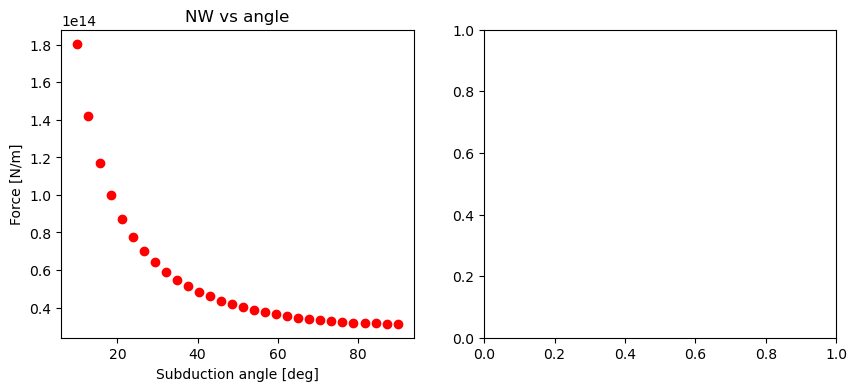

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(10,4))
ax1.set(title = "NW vs angle",
        xlabel = "Subduction angle [deg]",
        ylabel = "Force [N/m]",
        );

ax1.plot(theta_slab_array, NW_array, 'or');

# Fill the other plot (ax2) with the resistance force results!

### Friction along the subducting interface

Lets consider now the input of the friction along the subduction interface ($FS$) onto the force balance of our imaginary plate.

In [38]:
# Friction along the subduction interface ($FS$)
def fs_force(f, rho_up, g, Hbdt, theta_interface):
    return f * rho_up * g * (Hbdt**2) / (2 * np.tan(np.radians(theta_interface)))

In [48]:
# More parameters
theta_interface = 45    # Angle of the subduction interface [degrees]
Hbdt = 50e3             # Depth of the brittle-ductile transition [m]
f = 0.3                 # Friction coefficient

forces_df["FS"] = ""    # Add a new column to the dataframe
forces_df["FS"]["45 deg"] = fs_force(f, rho_p, g, Hbdt, theta_interface)    # Fill the new column with our results
forces_df.loc["45 deg"]

C:\Users\nbt571\AppData\Local\Temp\ipykernel_9100\361345704.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forces_df["FS"]["45 deg"] = fs_force(f, rho_p, g, Hbdt, theta_interface);    # Fill the new column with our results


NW     44349737316020.257812
R       6722058532840.401367
NSP    37627678783179.859375
FS     10657500000000.001953
Name: 45 deg, dtype: object

From what we discussed in class, if you were to try out a more realistic friction coefficient value, would that value be lower or higher that $0.3$? Do you expect to force to compare better to the NSP force, or drift apart even more?

As a last task, do a force balance for the plate. If the residual is not close to zero (bare in mind the orders of magnitude we are dealing with), what other force could be missing to achieve a state of equilibrium? Considering the order of magnitude, of the missing forces, which do you think is the most relevant one (i.e. the one that can account for most of the residual)?